<a href="https://colab.research.google.com/github/jayrom/fiap_exercises_gen/blob/main/3_13_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limpeza de dados

### Importar módulos

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

### Importar dados

In [ ]:
df = pd.read_csv('exemplos_limpeza_dados.csv')
print(df.shape)
print()
df

(12, 5)



,Country,Age,Salary,Grade,Purchased
0,France,44.0,72000.0,1st,No
1,France,44.0,72000.0,1st,No
2,Spain,27.0,48000.0,1st,Yes
3,Germany,30.0,54000.0,3rd,No
4,Spain,38.0,61000.0,1st,No
5,Germany,40.0,NaN,2nd,Yes
6,Germany,40.0,NaN,2nd,Yes
7,France,35.0,58000.0,2nd,Yes
8,Spain,NaN,52000.0,1st,No
9,France,48.0,79000.0,3rd,Yes


### Amostrar 5 linhas aleatórias

In [ ]:
df.sample(5)

,Country,Age,Salary,Grade,Purchased
6,Germany,40.0,NaN,2nd,Yes
10,Germany,50.0,83000.0,2nd,No
1,France,44.0,72000.0,1st,No
3,Germany,30.0,54000.0,3rd,No
2,Spain,27.0,48000.0,1st,Yes


### Exibir a estrutura da base

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    12 non-null     object 
 1   Age        11 non-null     float64
 2   Salary     10 non-null     float64
 3   Grade      12 non-null     object 
 4   Purchased  12 non-null     object 
dtypes: float64(2), object(3)
memory usage: 612.0+ bytes


### Exibir estatísticas básicas do dataframe

In [ ]:
df.describe()

,Age,Salary
count,11.000000,10.000000
mean,39.363636,64600.000000
std,7.060775,11852.800888
min,27.000000,48000.000000
25%,36.000000,55000.000000
50%,40.000000,64000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


### Visualizar missing values

<Axes: >

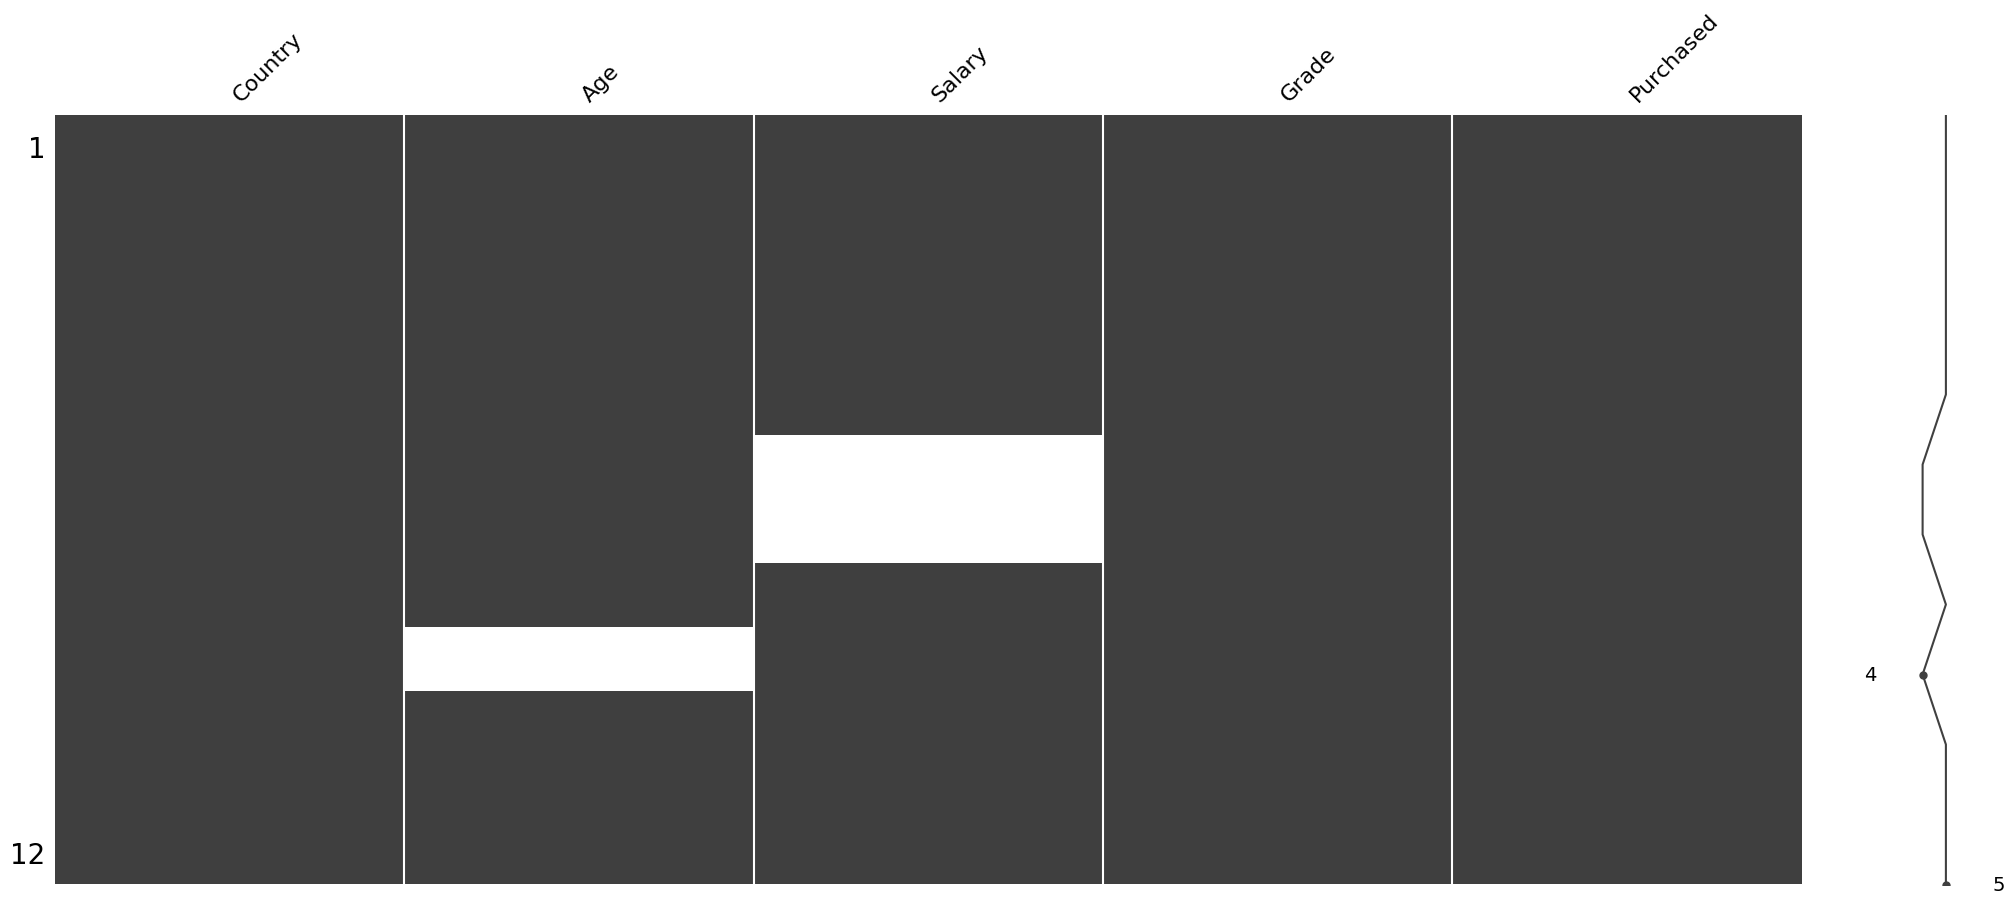

In [ ]:
msno.matrix(df)

### Remover dados duplicados em nova variável

In [ ]:
df_unicos = df.drop_duplicates()
df_unicos

,Country,Age,Salary,Grade,Purchased
0,France,44.0,72000.0,1st,No
2,Spain,27.0,48000.0,1st,Yes
3,Germany,30.0,54000.0,3rd,No
4,Spain,38.0,61000.0,1st,No
5,Germany,40.0,NaN,2nd,Yes
7,France,35.0,58000.0,2nd,Yes
8,Spain,NaN,52000.0,1st,No
9,France,48.0,79000.0,3rd,Yes
10,Germany,50.0,83000.0,2nd,No
11,France,37.0,67000.0,3rd,Yes


### Remover dados duplicados na mesma variável

In [ ]:
df.drop_duplicates(inplace=True)
df

,Country,Age,Salary,Grade,Purchased
0,France,44.0,72000.0,1st,No
2,Spain,27.0,48000.0,1st,Yes
3,Germany,30.0,54000.0,3rd,No
4,Spain,38.0,61000.0,1st,No
5,Germany,40.0,NaN,2nd,Yes
7,France,35.0,58000.0,2nd,Yes
8,Spain,NaN,52000.0,1st,No
9,France,48.0,79000.0,3rd,Yes
10,Germany,50.0,83000.0,2nd,No
11,France,37.0,67000.0,3rd,Yes


### Remover dados faltantes na MESMA variável

In [ ]:
df_unicos.dropna(inplace=True)
df_unicos

/tmp/ipython-input-35-758486924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unicos.dropna(inplace=True)


,Country,Age,Salary,Grade,Purchased
0,France,44.0,72000.0,1st,No
2,Spain,27.0,48000.0,1st,Yes
3,Germany,30.0,54000.0,3rd,No
4,Spain,38.0,61000.0,1st,No
7,France,35.0,58000.0,2nd,Yes
9,France,48.0,79000.0,3rd,Yes
10,Germany,50.0,83000.0,2nd,No
11,France,37.0,67000.0,3rd,Yes


### Preencher dados faltantes

In [ ]:
# Coloca a média da idade na coluna Age
df.fillna({"Age": df["Age"].mean()}, inplace=True)

# Coloca a mediana do salário na coluna Salary
df.fillna({"Salary": df["Salary"].median()}, inplace=True)

### Exibir transformações nos dados

In [ ]:
df

,Country,Age,Salary,Grade,Purchased
0,France,44.000000,72000.0,1st,No
2,Spain,27.000000,48000.0,1st,Yes
3,Germany,30.000000,54000.0,3rd,No
4,Spain,38.000000,61000.0,1st,No
5,Germany,40.000000,61000.0,2nd,Yes
7,France,35.000000,58000.0,2nd,Yes
8,Spain,38.777778,52000.0,1st,No
9,France,48.000000,79000.0,3rd,Yes
10,Germany,50.000000,83000.0,2nd,No
11,France,37.000000,67000.0,3rd,Yes


In [ ]:
df_unicos

,Country,Age,Salary,Grade,Purchased
0,France,44.0,72000.0,1st,No
2,Spain,27.0,48000.0,1st,Yes
3,Germany,30.0,54000.0,3rd,No
4,Spain,38.0,61000.0,1st,No
7,France,35.0,58000.0,2nd,Yes
9,France,48.0,79000.0,3rd,Yes
10,Germany,50.0,83000.0,2nd,No
11,France,37.0,67000.0,3rd,Yes


### Codificar dados categóricos ordinais

In [ ]:
le = LabelEncoder()
df["Purchased_encoder"] = le.fit_transform( df["Purchased"] )
df["Grade_encoder"] = le.fit_transform( df["Grade"] )
df

,Country,Age,Salary,Grade,Purchased,Purchased_encoder,Grade_encoder
0,France,44.000000,72000.0,1st,No,0,0
2,Spain,27.000000,48000.0,1st,Yes,1,0
3,Germany,30.000000,54000.0,3rd,No,0,2
4,Spain,38.000000,61000.0,1st,No,0,0
5,Germany,40.000000,61000.0,2nd,Yes,1,1
7,France,35.000000,58000.0,2nd,Yes,1,1
8,Spain,38.777778,52000.0,1st,No,0,0
9,France,48.000000,79000.0,3rd,Yes,1,2
10,Germany,50.000000,83000.0,2nd,No,0,1
11,France,37.000000,67000.0,3rd,Yes,1,2


### Codificar dados categóricos nominais

In [ ]:
aux = pd.get_dummies( df["Country"] )
final = pd.concat( [df, aux], axis=1 )
final

,Country,Age,Salary,Grade,Purchased,Purchased_encoder,Grade_encoder,France,Germany,Spain
0,France,44.000000,72000.0,1st,No,0,0,True,False,False
2,Spain,27.000000,48000.0,1st,Yes,1,0,False,False,True
3,Germany,30.000000,54000.0,3rd,No,0,2,False,True,False
4,Spain,38.000000,61000.0,1st,No,0,0,False,False,True
5,Germany,40.000000,61000.0,2nd,Yes,1,1,False,True,False
7,France,35.000000,58000.0,2nd,Yes,1,1,True,False,False
8,Spain,38.777778,52000.0,1st,No,0,0,False,False,True
9,France,48.000000,79000.0,3rd,Yes,1,2,True,False,False
10,Germany,50.000000,83000.0,2nd,No,0,1,False,True,False
11,France,37.000000,67000.0,3rd,Yes,1,2,True,False,False


### Eliminar colunas não codificadas

In [ ]:
final.drop( columns=["Country", "Grade", "Purchased"] , inplace=True )
final

,Age,Salary,Purchased_encoder,Grade_encoder,France,Germany,Spain
0,44.000000,72000.0,0,0,True,False,False
2,27.000000,48000.0,1,0,False,False,True
3,30.000000,54000.0,0,2,False,True,False
4,38.000000,61000.0,0,0,False,False,True
5,40.000000,61000.0,1,1,False,True,False
7,35.000000,58000.0,1,1,True,False,False
8,38.777778,52000.0,0,0,False,False,True
9,48.000000,79000.0,1,2,True,False,False
10,50.000000,83000.0,0,1,False,True,False
11,37.000000,67000.0,1,2,True,False,False


### Salvar dados padronizados

Mapeia os dados para uma mesma escala.

In [ ]:
# Copiar e padronizar os dados
sc = StandardScaler()
final_padronizado = sc.fit_transform(final)

# Salvar dataframe
df_final_padronizado = pd.DataFrame(final_padronizado,
                                    columns=final.columns)
df_final_padronizado

,Age,Salary,Purchased_encoder,Grade_encoder,France,Germany,Spain
0,0.758874,0.772568,-1.0,-1.083473,1.224745,-0.654654,-0.654654
1,-1.711504,-1.408800,1.0,-1.083473,-0.816497,-0.654654,1.527525
2,-1.275555,-0.863458,-1.0,1.324244,-0.816497,1.527525,-0.654654
3,-0.113024,-0.227226,-1.0,-1.083473,-0.816497,-0.654654,1.527525
4,0.177609,-0.227226,1.0,0.120386,-0.816497,1.527525,-0.654654
5,-0.548973,-0.499897,1.0,0.120386,1.224745,-0.654654,-0.654654
6,0.000000,-1.045239,-1.0,-1.083473,-0.816497,-0.654654,1.527525
7,1.340140,1.408800,1.0,1.324244,1.224745,-0.654654,-0.654654
8,1.630773,1.772361,-1.0,0.120386,-0.816497,1.527525,-0.654654
9,-0.258340,0.318116,1.0,1.324244,1.224745,-0.654654,-0.654654


### Salvar dados normalizados

Mapeia os dados para o intervalo especificado (10 e 20).

In [ ]:
# Copiar e normalizar os dados
mm = MinMaxScaler(feature_range=(10, 20))
final_normalizado = mm.fit_transform(final)

# Salvar dataframe
df_final_normalizado = pd.DataFrame(final_normalizado, columns=final.columns)
df_final_normalizado

,Age,Salary,Purchased_encoder,Grade_encoder,France,Germany,Spain
0,17.391304,16.857143,10.0,10.0,20.0,10.0,10.0
1,10.000000,10.000000,20.0,10.0,10.0,10.0,20.0
2,11.304348,11.714286,10.0,20.0,10.0,20.0,10.0
3,14.782609,13.714286,10.0,10.0,10.0,10.0,20.0
4,15.652174,13.714286,20.0,15.0,10.0,20.0,10.0
5,13.478261,12.857143,20.0,15.0,20.0,10.0,10.0
6,15.120773,11.142857,10.0,10.0,10.0,10.0,20.0
7,19.130435,18.857143,20.0,20.0,20.0,10.0,10.0
8,20.000000,20.000000,10.0,15.0,10.0,20.0,10.0
9,14.347826,15.428571,20.0,20.0,20.0,10.0,10.0


### Exportar arquivos

In [ ]:
# Exportar arquivos
df_final_padronizado.to_csv("dados_padronizados.csv")
df_final_normalizado.to_csv("dados_normalizados.csv")